# Task 4.9 part 2

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r'C:\Users\Spero\Documents\Instacart Basket Analysis'

In [3]:
#import data
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_cus_merged.pkl'))

In [4]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-fruquent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-fruquent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-fruquent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-fruquent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-fruquent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 3. Create a bar chart, histogram, and line chart using sample subset for the line chart

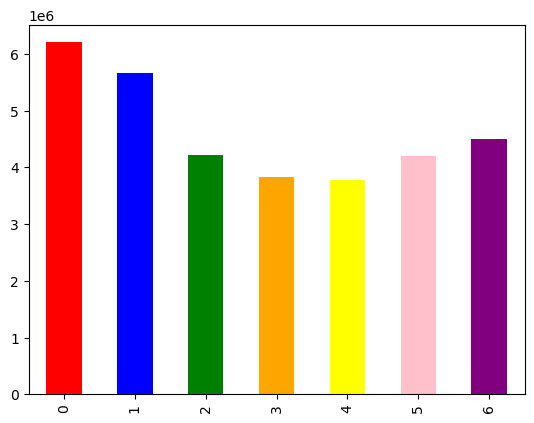

In [5]:
# bar chart
bar = df_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green', 'orange', 'yellow', 'pink', 'purple'])

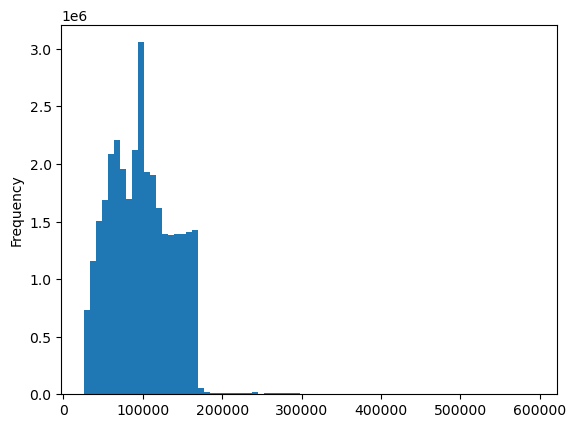

In [6]:
# histogram
hist = df_merged['income'].plot.hist(bins = 75)

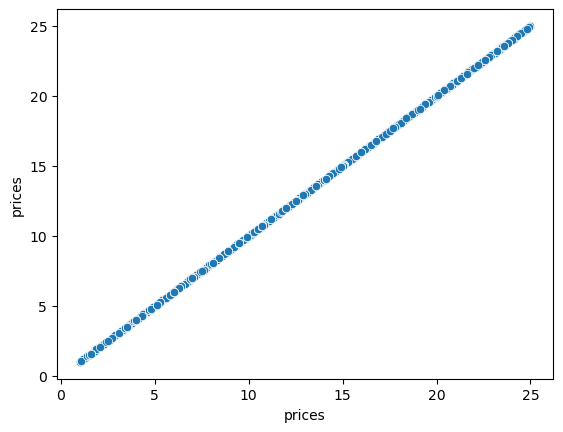

In [7]:
#scatterplot
splot = sns.scatterplot(x = 'prices', y = 'prices', data = df_merged)

In [8]:
# defining the subset of the dataframe for the line chart (for top 1 million)
# create random sampling
dev = np.random.rand(len(df_merged)) <= 0.7

In [9]:
dev

array([ True,  True, False, ..., False,  True, False])

In [10]:
#splitting the dataframe (70% of the sample in the dataframe)
big = df_merged[dev]

In [11]:
#splitting dataframe (30% will be in this dataframe)
small = df_merged[~dev]

In [12]:
len(df_merged)

32404859

In [16]:
len(big) + len(small)

32404859

In [17]:
df_merged2 = small[['orders_day_of_week', 'prices']]

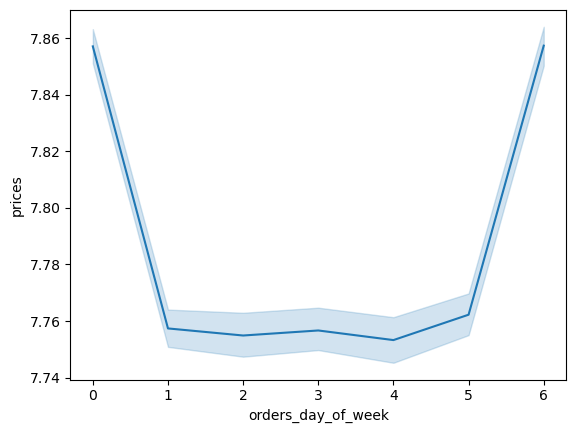

In [18]:
line = sns.lineplot(data = df_merged2, x = 'orders_day_of_week', y = 'prices')

# 3.  You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column

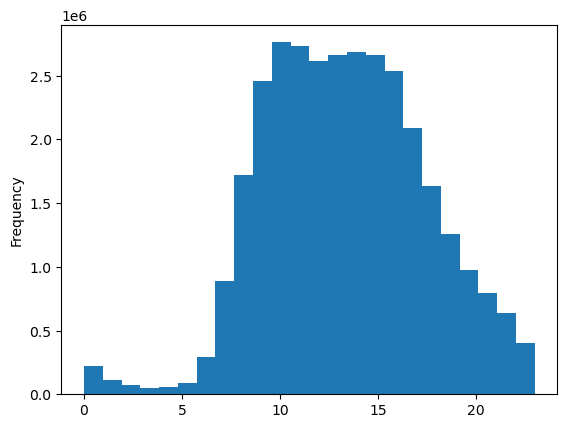

In [20]:
hist_hour = df_merged['order_hour_of_day'].plot.hist(bins = 24)

# the histogram above shows (in the millions) the amount of orders placed during each hour starting at 0 to 23. 0 = 12AM and 23 = 11PM

In [21]:
#checking accuracy of histogram
df_merged['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

# 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

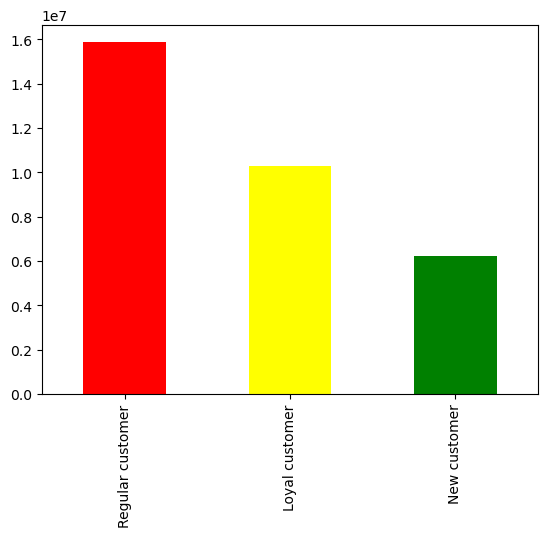

In [22]:
# plotting bar chart for the loyalty flag
loyalty_bar = df_merged['loyalty_flag'].value_counts().plot.bar(color = ['red', 'yellow', 'green'])

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [23]:
df_prices_hour = small[['order_hour_of_day', 'prices']]

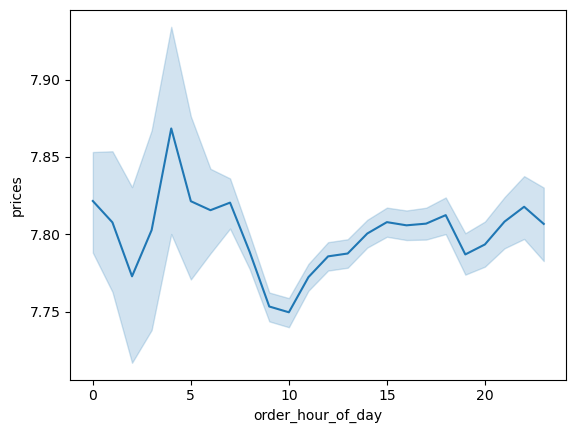

In [24]:
#create line chart
line2 = sns.lineplot(data = df_prices_hour, x = 'order_hour_of_day', y = 'prices')

# 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [25]:
# using the earlier splitting of data of 30% and selecting the right columns
df_fam_status_age = small [['no_of_dependents', 'age']]

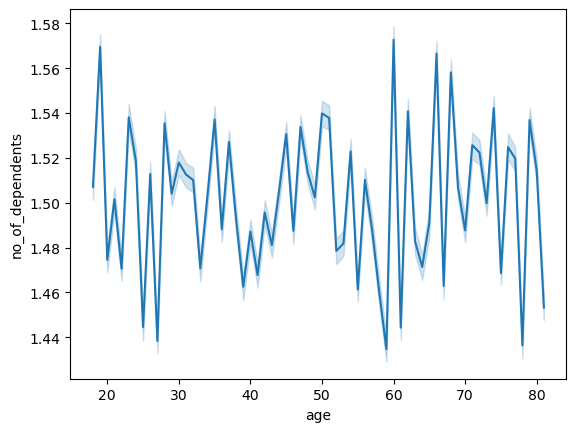

In [26]:
#create line chart
line3 = sns.lineplot(data = df_fam_status_age, x = 'age', y = 'no_of_dependents')

# The line chart above show the relationship between customer's age and the number of dependents in each family. However, there does not appear to be a strong relationship between the two.

# 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [27]:
#using the earlier splitted data of 30% and selecting the right columns
df_income_age = small [['income', 'age']]

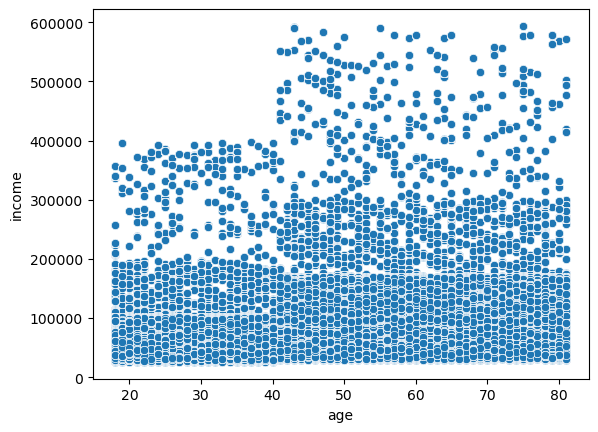

In [28]:
#create a scatter plot
plot_spending = sns.scatterplot(x = 'age', y = 'income', data = df_income_age)

# The scatterplot show the relationship between age and income of instacart customers.
# 1. There are a large amount of customers of all ages that earn up to 200,000 dollars
# 2. only customers of 40 years or older are earning up to 600,000 dollars
# 3. My conclusion is that instacart customers of 40 years or olders have the ability to spend more based on their higher level of income.

# 8. export visualizations as .png files

In [29]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_4_9.png'))

In [30]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_4_9.png'))

In [33]:
splot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'splot_4_9.png'))

In [34]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_4_9.png'))

In [35]:
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_4_9.png'))

In [36]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Loyalty_bar_4_9.png'))

In [37]:
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line2.png'))

In [38]:
line3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line3.png'))

In [ ]:
plot_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_spending.png'))